In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [3]:
model = ResNet50(include_top=False, pooling='avg')

In [4]:
new_model = Sequential()
new_model.add(model)

In [5]:
new_model.add(Dense(1, ))

In [7]:
print(new_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


In [15]:
DIR = 'SCUT-FBP5500_v2/'

In [16]:
import pandas as pd

In [20]:
df = pd.read_csv(DIR+"All_Ratings.csv")

In [21]:
from collections import defaultdict
import numpy as np

In [22]:
all_images = defaultdict(list)

In [23]:
for filename, rating in df[['Filename', 'Rating']].values:
    all_images[filename].append(rating)

In [25]:
data = {}
for filename, ratings in all_images.items():
    data[filename] = np.mean(ratings)

In [26]:
len(data)

5500

In [27]:
ratings = dict(data)

In [28]:
import os
from keras.preprocessing import image

Using TensorFlow backend.


In [29]:
images = []
ys = []
for filename in os.listdir(DIR + '/Images'):
    img_path = DIR + '/Images/' + filename
    img=image.load_img(img_path)
    img=image.img_to_array(img)
    images.append(img)
    ys.append(ratings[filename])

In [30]:
len(images)

5500

In [31]:
len(ys)

5500

In [32]:
import matplotlib.pyplot as plt

3.433333333333333


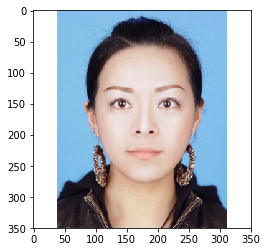

In [34]:
IND = 1
plt.imshow(images[IND]/255.0)
print(ys[IND])
plt.show()

In [35]:
import random

In [68]:
all_data = list(zip(images, ys))

In [69]:
type(all_data)

list

In [70]:
random.shuffle(all_data)

In [72]:
print(all_data[0])

(array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 

In [73]:
train_size = int(len(all_data)*0.8)
train_data = all_data[:train_size]
test_data = all_data[train_size:]

In [74]:
train_images, train_ys = zip(*train_data)

In [75]:
train_images = list(train_images)
train_ys = list(train_ys)

In [76]:
len(train_images)

4400

1.0166666666666666


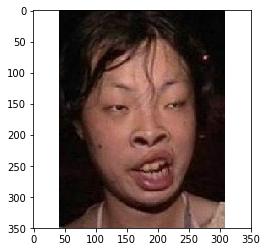

In [78]:
IND = np.argmin(train_ys)
plt.imshow(train_images[IND]/255.0)
print(train_ys[IND])
plt.show()

In [79]:
test_images, test_ys = zip(*test_data)
test_images = list(test_images)
test_ys = list(test_ys)

4.666666666666667


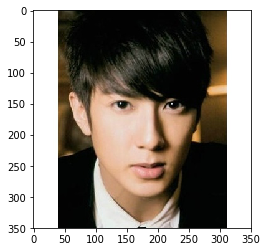

In [81]:
IND = np.argmax(test_ys)
plt.imshow(test_images[IND]/255.0)
print(test_ys[IND])
plt.show()

In [83]:
train_X = np.array(train_images)
print(train_X.shape)

(4400, 350, 350, 3)


In [84]:
train_Y = np.array(train_ys)
print(train_Y.shape)

(4400,)


In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler().fit(train_Y.reshape(-1, 1))

In [88]:
rain_Y = scaler.transform(train_Y.reshape(-1, 1))

In [90]:
test_X = np.array(test_images)
print(test_X.shape)

(1100, 350, 350, 3)


In [91]:
test_Y = np.array(test_ys)
print(test_Y.shape)

(1100,)


In [92]:
test_Y = scaler.transform(test_Y.reshape(-1, 1))

In [93]:
print(train_Y.shape)
print(test_Y.shape)

(4400,)
(1100, 1)


In [94]:
#中间省略一万字，直接开始训练

In [95]:
from tensorflow.python.keras.layers import Input, Convolution2D, BatchNormalization, Activation
from tensorflow.python.keras import Model

In [96]:
g_input = Input(shape=(350, 350, 3))
H = Convolution2D(200, 3, padding='same')(g_input)
H = BatchNormalization()(H)
H = Activation('relu')(H)
H = Convolution2D(200, 3, padding='same')(H)
H = BatchNormalization()(H)
H = Activation('relu')(H)
H = Convolution2D(3, 1, 1, padding='same')(H)
g_V = Activation('sigmoid')(H)
generator = Model(g_input,g_V)
generator.compile(loss='binary_crossentropy', optimizer='adam')
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 350, 350, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 350, 350, 200)     5600      
_________________________________________________________________
batch_normalization (BatchNo (None, 350, 350, 200)     800       
_________________________________________________________________
activation_49 (Activation)   (None, 350, 350, 200)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 350, 350, 200)     360200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 350, 350, 200)     800       
_________________________________________________________________
activation_50 (Activation)   (None, 350, 350, 200)     0         
__________

In [97]:
d_input = Input(shape=(350, 350, 3))
D = new_model(d_input)
#D = model(d_input)
#D = Dense(1)(D)
discriminator = Model(d_input, D)
discriminator.compile(loss='mean_squared_error', optimizer='adam')
discriminator.summary()
discriminator.trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 350, 350, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 1)                 23589761  
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [98]:
gan_input = Input(shape=(350, 350, 3))
H = generator(gan_input)

gan_V = discriminator(H)
GAN = Model(gan_input, gan_V)
GAN.compile(loss='mean_squared_error', optimizer='adam')
GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 350, 350, 3)       0         
_________________________________________________________________
model (Model)                (None, 350, 350, 3)       368003    
_________________________________________________________________
model_1 (Model)              (None, 1)                 23589761  
Total params: 23,957,764
Trainable params: 367,203
Non-trainable params: 23,590,561
_________________________________________________________________


In [99]:
GAN.fit(train_X, train_Y)

Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[32,350,350,200] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model/conv2d/Conv2D}} = Conv2D[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/model/conv2d/Conv2D_grad/Conv2DBackpropFilter"], data_format="NHWC", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_input_4_0_0, model/conv2d/Conv2D/ReadVariableOp)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
